# Exploratory Data Analysis

Notes à moi-même :
- Essayer de normaliser les données pour voir ce que ça donne
- Détecter les outliers et reprendre les études pour voir ce que ça donne (ex : "...more" pour les genres, les prix trop élevés, les livres avec très peu de notes, ...)
- Anova pour les prix et autre
- Popularité des livres (métriques)
- Rating moyen des auteurs en fonction de leur nombre de livres parus (distributions)
- Corrélation n_books et ratings

In [163]:
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc

## Preprocessing

Before exploring our data, it is crucial to first clean it and remove any duplicate (title, author).

In [70]:
df = pd.read_csv("./../data/goodreads_data.csv", converters={"genres": lambda x: x[1:-1].split(",")})
df["publication_date"] = pd.to_datetime(df["published"].apply(lambda x: " ".join(str(x).split()[:3])), errors="coerce")
df["publication_year"] = df["publication_date"].dt.year.astype("Int64")

dic_rating = {1: "one_star", 2: "two_stars", 3: "three_stars", 4: "four_stars", 5: "five_stars"}
for key, value in dic_rating.items():
    df[value] = df["ratings"].apply(lambda x: float(x[1:-1].split(",")[key-1])) / df["n_ratings"]
df["average_rating"] = df["ratings"].apply(lambda x: sum([(i+1) * float(x[1:-1].split(",")[i]) for i in range(5)])) / df["n_ratings"]

df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,language,setting,publication_date,publication_year,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,English,NaN,2010-03-09,2010,0.007093,0.027652,0.219726,0.461718,0.283811,3.987503
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,English,['Kinjanja'],2003-01-14,2003,0.017935,0.051216,0.243523,0.435233,0.252092,3.852332
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,English,"['Galveston, Texas']",2010-05-01,2010,0.006506,0.039963,0.195632,0.341543,0.416357,4.121283
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,English,NaN,2017-04-18,2017,0.015915,0.054524,0.235485,0.385500,0.308576,3.916298
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,English,NaN,2013-10-17,2013,0.007042,0.042254,0.161972,0.288732,0.500000,4.232394


In [71]:
print("Number of books (with duplicates) : ", len(df))
df.drop_duplicates(subset=["title", "author"], keep='first', inplace=True, ignore_index=True)
print("Number of books (without duplicates) : ", len(df))

Number of books (with duplicates) :  24630
Number of books (without duplicates) :  19666


## Global Analysis

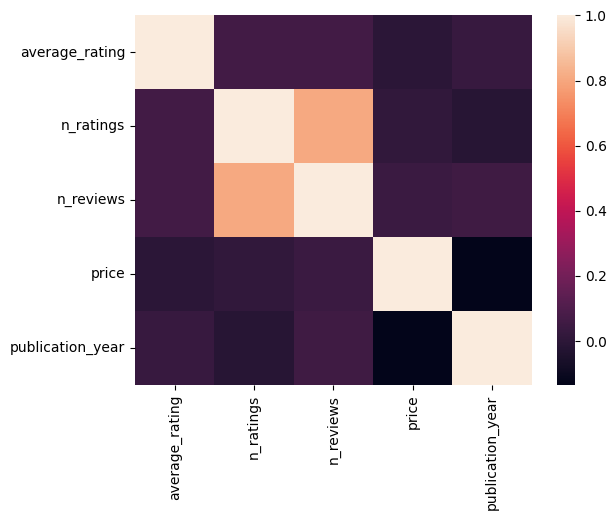

In [83]:
sns.heatmap(df[["average_rating", "n_ratings", "n_reviews", "price", "publication_year"]].corr())
plt.show()

## Focus on the Accessibility

In [ ]:
# TODO
# Format
# Language

## Focus on the Authors

In [72]:
authors_groups = df.groupby("author")
authors_number_of_books = authors_groups.count().sort_values(by="title", ascending=False)
authors_number_of_books.head(5)

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,...,language,setting,publication_date,publication_year,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
author,,,,,,,,,,,,,,,,,,,,,
Neil Gaiman,48,48,48,0,48,48,48,48,48,48,...,48,12,48,48,48,48,48,48,48,48
Stephen King,36,36,36,36,36,36,36,36,36,36,...,36,23,36,36,36,36,36,36,36,36
R.L. Stine,34,34,34,34,34,34,34,34,34,34,...,34,3,34,34,34,34,34,34,34,34
Nora Roberts,32,32,32,32,32,32,32,32,32,32,...,32,31,32,32,32,32,32,32,32,32
J.D. Robb,26,26,26,26,26,26,26,26,26,26,...,25,17,26,26,26,26,26,26,26,26


In [73]:
authors_number_of_books.describe()

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,...,language,setting,publication_date,publication_year,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
count,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,...,12061.000000,12061.000000,12061.000000,12061.0,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000
mean,1.630545,1.630545,1.630379,1.445237,1.630545,1.630545,1.630545,1.630545,1.630545,1.630545,...,1.600945,0.477987,1.618937,1.618937,1.630462,1.630462,1.630462,1.630462,1.630462,1.630462
std,1.792645,1.792645,1.792610,1.827627,1.792645,1.792645,1.792645,1.792645,1.792645,1.792645,...,1.786451,1.180459,1.790444,1.790444,1.792466,1.792466,1.792466,1.792466,1.792466,1.792466
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,48.000000,48.000000,48.000000,36.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,31.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000


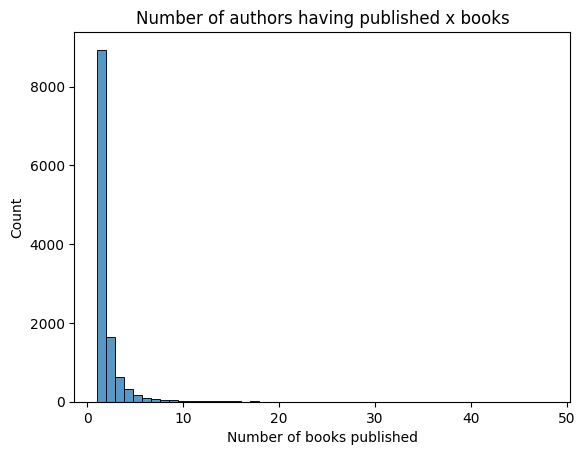

In [123]:
plt.title("Number of authors having published x books")
sns.histplot(authors_number_of_books, x="title", bins=50)
plt.xlabel("Number of books published")
plt.show()

In our dataset, most authors have only written one book, the most prolific one having published 48 books. It is probably an outlier as we can expect 3 out of 4 authors to have written less than 2 books. Plus, the average author should have written only 1 or 2 books.

In [101]:
books_published_per_year = df.groupby("publication_year").count().sort_values(by="publication_year", ascending=False)
books_published_per_year.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,isbn,language,setting,publication_date,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
publication_year,,,,,,,,,,,,,,,,,,,,,
2024,69,69,69,69,57,69,69,69,69,69,...,58,67,9,69,69,69,69,69,69,69
2023,166,166,166,166,144,166,166,166,166,166,...,93,162,31,166,166,166,166,166,166,166
2022,218,218,218,218,172,218,218,218,218,218,...,133,213,42,218,218,218,218,218,218,218
2021,314,314,314,314,266,314,314,314,314,314,...,207,307,67,314,314,314,314,314,314,314
2020,394,394,394,394,320,394,394,394,394,394,...,258,385,72,394,394,394,394,394,394,394


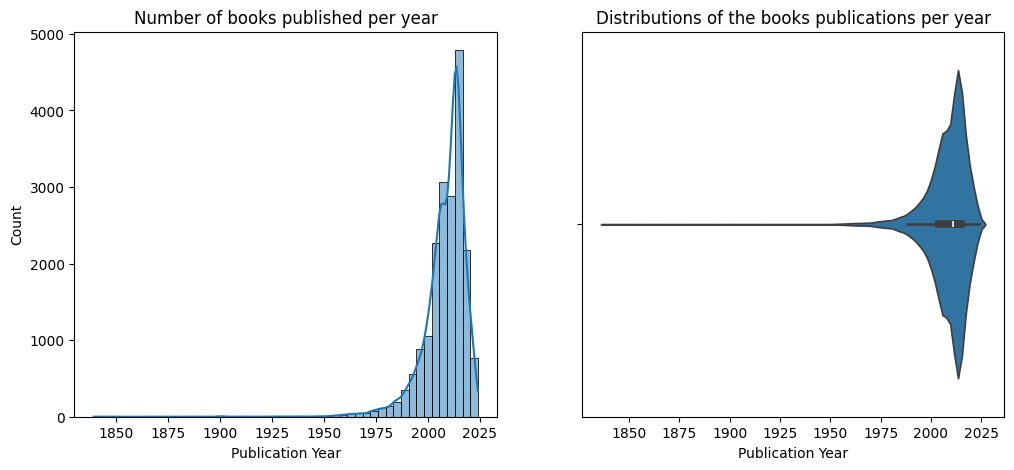

In [116]:
plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Number of books published per year")
sns.histplot(df, x="publication_year", bins=50, kde=True)
plt.xlabel("Publication Year")

plt.subplot(1, 2, 2)
plt.title("Distributions of the books publications per year")
sns.violinplot(df, x="publication_year")
plt.xlabel("Publication Year")

plt.show()

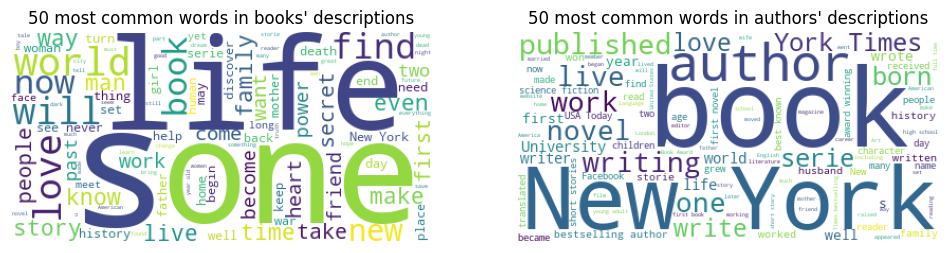

In [96]:
authors_descriptions = " ".join(df["author_description"].dropna())
books_descriptions = " ".join(df["description"].dropna())

wordcloud_authors = wc.WordCloud(background_color="white", max_words=100).generate(authors_descriptions)
wordcloud_books = wc.WordCloud(background_color="white", max_words=100).generate(books_descriptions)

plt.subplots(1, 2, figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_books)
plt.title("50 most common words in books' descriptions")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_authors)
plt.title("50 most common words in authors' descriptions")
plt.axis("off")

plt.show()

## Focus on the Genres

In [97]:
df_genres = df.explode("genres")
df_genres["genres"] = df_genres["genres"].apply(lambda x: x.strip()[1:-1]) 
df_genres["genres"].astype("category")
df_genres = df_genres[df_genres["genres"] != "...more"]

genres_groups = df_genres.groupby("genres")
genres_number_of_books = genres_groups.count().sort_values(by="title", ascending=False)
genres_number_of_books.head(5)

,title,author,price,description,author_description,n_ratings,n_reviews,ratings,pages_format,publication_info,...,language,setting,publication_date,publication_year,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
genres,,,,,,,,,,,,,,,,,,,,,
Fiction,9995,9995,9995,9993,9338,9995,9995,9995,9995,9995,...,9863,4051,9935,9935,9995,9995,9995,9995,9995,9995
Romance,6065,6065,6065,6064,5682,6065,6065,6065,6065,6065,...,5931,2166,6025,6025,6065,6065,6065,6065,6065,6065
Nonfiction,5116,5116,5116,5116,4023,5116,5116,5116,5116,5116,...,5020,706,5079,5079,5116,5116,5116,5116,5116,5116
Fantasy,4912,4912,4912,4912,4545,4912,4912,4912,4912,4912,...,4850,1330,4873,4873,4912,4912,4912,4912,4912,4912
Young Adult,3813,3813,3813,3813,3504,3813,3813,3813,3813,3813,...,3739,1209,3786,3786,3813,3813,3813,3813,3813,3813


Total number of different genres :  810


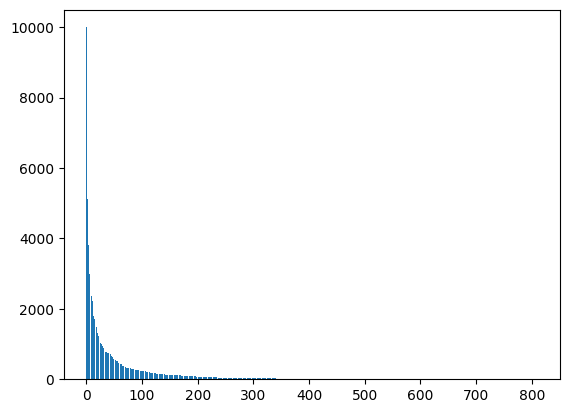

In [98]:
genres_list = np.unique(df_genres["genres"])
print("Total number of different genres : ", len(genres_list))

genres_dict = {genre: i for i, genre in enumerate(genres_list)}
genres_counts = df_genres["genres"].value_counts()

plt.bar(x=np.arange(len(genres_list)), height=genres_counts, align="center")
plt.show()

In [ ]:
# TODO
# Most popular genres per year
# Genres counts evolutions per year
# -> Probably restrict to the 5-10 most popular genres

## Focus on the Prices

In [128]:
prices = df["price"].dropna()
prices.describe()

count    19666.000000
mean         7.719634
std          6.527542
min          0.000000
25%          2.990000
50%          7.990000
75%         11.577500
max        199.730000
Name: price, dtype: float64

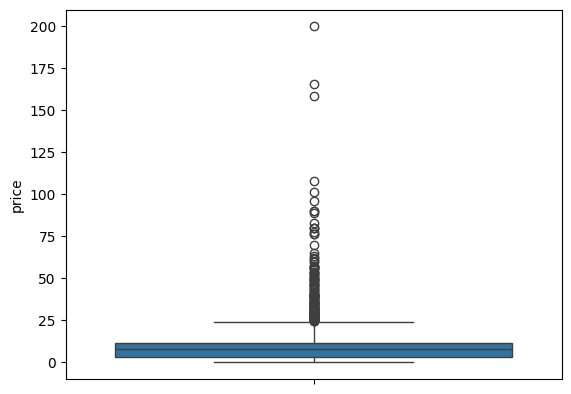

In [130]:
sns.boxplot(data=prices)
plt.show()

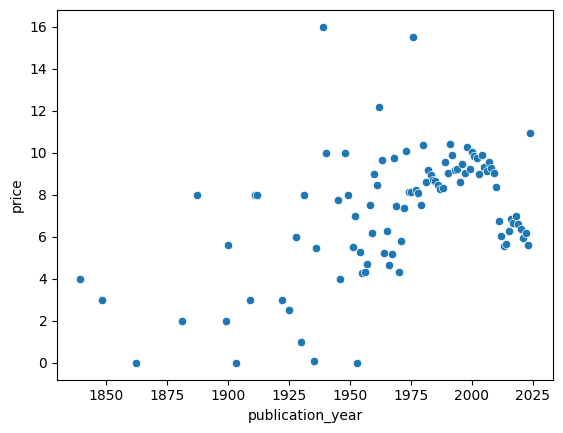

In [147]:
average_prices = df.groupby("publication_year")["price"].mean()
sns.scatterplot(data=average_prices)
plt.show()

## Focus on the Ratings

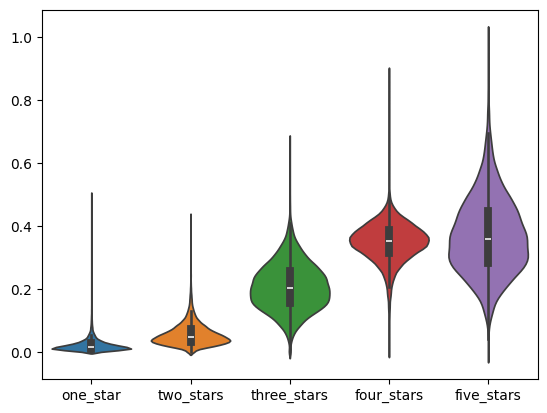

In [150]:
sns.violinplot(data=df[["one_star", "two_stars", "three_stars", "four_stars", "five_stars"]])
plt.show()

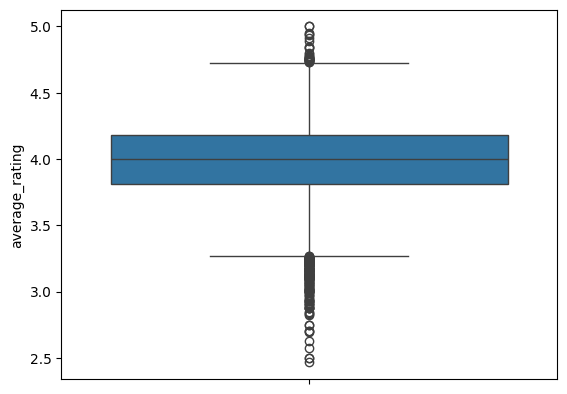

In [152]:
sns.boxplot(data=df["average_rating"])
plt.show()

From this boxplot, we can deduce that:
- The distribution is biased, so the scraped books are mainly books with great ratings
- Users give high ratings in average
- Most books are worth your time

In [153]:
authors_average_rating = df[["author", "average_rating", "n_ratings"]].groupby("author").mean().sort_values(by="average_rating", ascending=False)
authors_average_rating.head(5)

,average_rating,n_ratings
author,,
Phillip B. Chute,5.000000,3.0
J. David Clarke,5.000000,2.0
Elias Zapple,4.946429,56.0
A. Razor,4.944444,18.0
Isabel Ibañez,4.909091,22.0


<Axes: xlabel='log_n_ratings', ylabel='average_rating'>

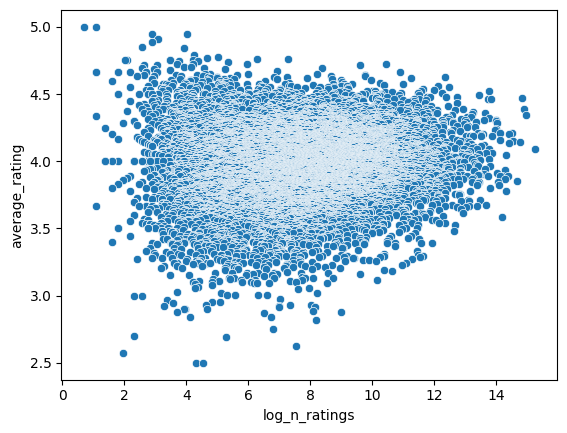

In [154]:
authors_average_rating["log_n_ratings"] = np.log(authors_average_rating["n_ratings"])
sns.scatterplot(authors_average_rating, x="log_n_ratings", y="average_rating")

Books with few ratings seem to receive more extreme ratings (positive as well as negative), whereas books with a lot of ratings have more uniform ratings (between 3.5 and 4.5).

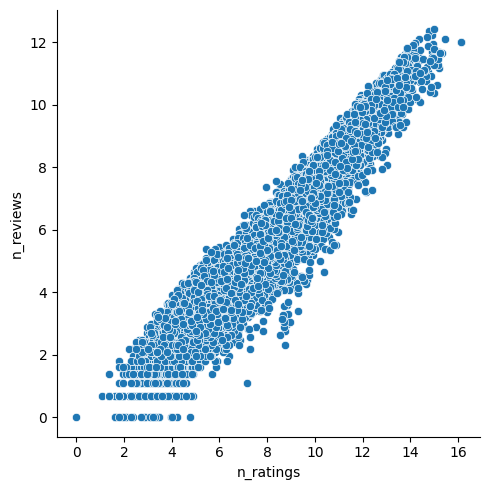

In [162]:
sns.relplot(data=df, x=np.log(df["n_ratings"] + 1), y=np.log(df["n_reviews"] + 1))
plt.show()

In [167]:
p = pearsonr(df["n_ratings"], df["n_reviews"])
p_loglog = pearsonr(np.log(df["n_ratings"] + 1), np.log(df["n_reviews"] + 1))

print(f"Pearson Coefficient: {p.statistic:.2f}", )
print(f"Pearson Coefficient (log-log): {p_loglog.statistic:.2f}", )

Pearson Coefficient: 0.81
Pearson Coefficient (log-log): 0.95


In [ ]:
# TODO
# Nb ratings et moyenne selon l'année de publication